In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp


In [2]:
df = pd.read_csv('./data/amazon.csv')
pd.set_option('display.max_columns', None)

In [12]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,346,1158,10,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,623,522,817,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,848,134,10,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...",88,207,1025,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,819,1023,10,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,849,482,827,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,643,1264,10,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,254,614,786,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,588,829,10,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,17,1139,114,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [13]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [14]:
print(f"The number of rows in the dataset: {df.shape[0]} and the number of columns: {df.shape[1]}")

The number of rows in the dataset: 1465 and the number of columns: 16


In [15]:
df.info

<bound method DataFrame.info of       product_id  product_name  category discounted_price actual_price  \
0            346          1158        10             ₹399       ₹1,099   
1            848           134        10             ₹199         ₹349   
2            819          1023        10             ₹199       ₹1,899   
3            643          1264        10             ₹329         ₹699   
4            588           829        10             ₹154         ₹399   
...          ...           ...       ...              ...          ...   
1460         673           696       192             ₹379         ₹919   
1461         201           850       172           ₹2,280       ₹3,045   
1462          27           164       138           ₹2,219       ₹3,080   
1463          61           462       129           ₹1,399       ₹1,890   
1464         134           195       174           ₹2,863       ₹3,690   

     discount_percentage rating rating_count  \
0                    64%    4.2

In [16]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [17]:
# Changing the data type of discounted price and actual price

df['discounted_price'] = df['discounted_price'].astype(str).str.replace("₹", '', regex=False).str.replace(",", '', regex=False).astype('float64')
df['actual_price'] = df['actual_price'].astype(str).str.replace("₹", '', regex=False).str.replace(",", '', regex=False).astype('float64')

In [18]:
# Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

In [19]:
# Finding unusual string in rating column
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [20]:
# Check the strange row
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,669,363,187,2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,845,335,524,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [21]:
# Changing Rating Columns Data Type

df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [22]:
# Changing 'rating_count' Column Data Type

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   int64  
 1   product_name         1465 non-null   int64  
 2   category             1465 non-null   int64  
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   int64  
 10  user_name            1465 non-null   int64  
 11  review_id            1465 non-null   int64  
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [24]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,user_name,review_id
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000,1465.000000,1465.000000,1465.000000
mean,678.739932,671.842321,95.152218,3125.310874,5444.990635,0.476915,4.096451,18295.541353,598.288055,604.503754,587.967918
std,386.735334,389.327207,60.595638,6944.304394,10874.826864,0.216359,0.291620,42753.864952,346.559746,348.386355,342.115116
min,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,346.000000,336.000000,31.000000,325.000000,800.000000,0.320000,4.000000,1186.000000,298.000000,301.000000,292.000000
50%,681.000000,672.000000,97.000000,799.000000,1650.000000,0.500000,4.100000,5179.000000,605.000000,614.000000,587.000000
75%,1011.000000,1010.000000,141.000000,1999.000000,4295.000000,0.630000,4.300000,17336.500000,900.000000,906.000000,878.000000
max,1350.000000,1336.000000,210.000000,77990.000000,139900.000000,0.940000,5.000000,426973.000000,1193.000000,1193.000000,1193.000000


In [25]:
df.isnull().sum().sort_values(ascending=False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [26]:
# Find missing values percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False) 

rating_count           0.14
product_id             0.00
product_name           0.00
category               0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64

In [27]:
# Find total number of missing values
df.isnull().sum().sum()

np.int64(2)

<Axes: >

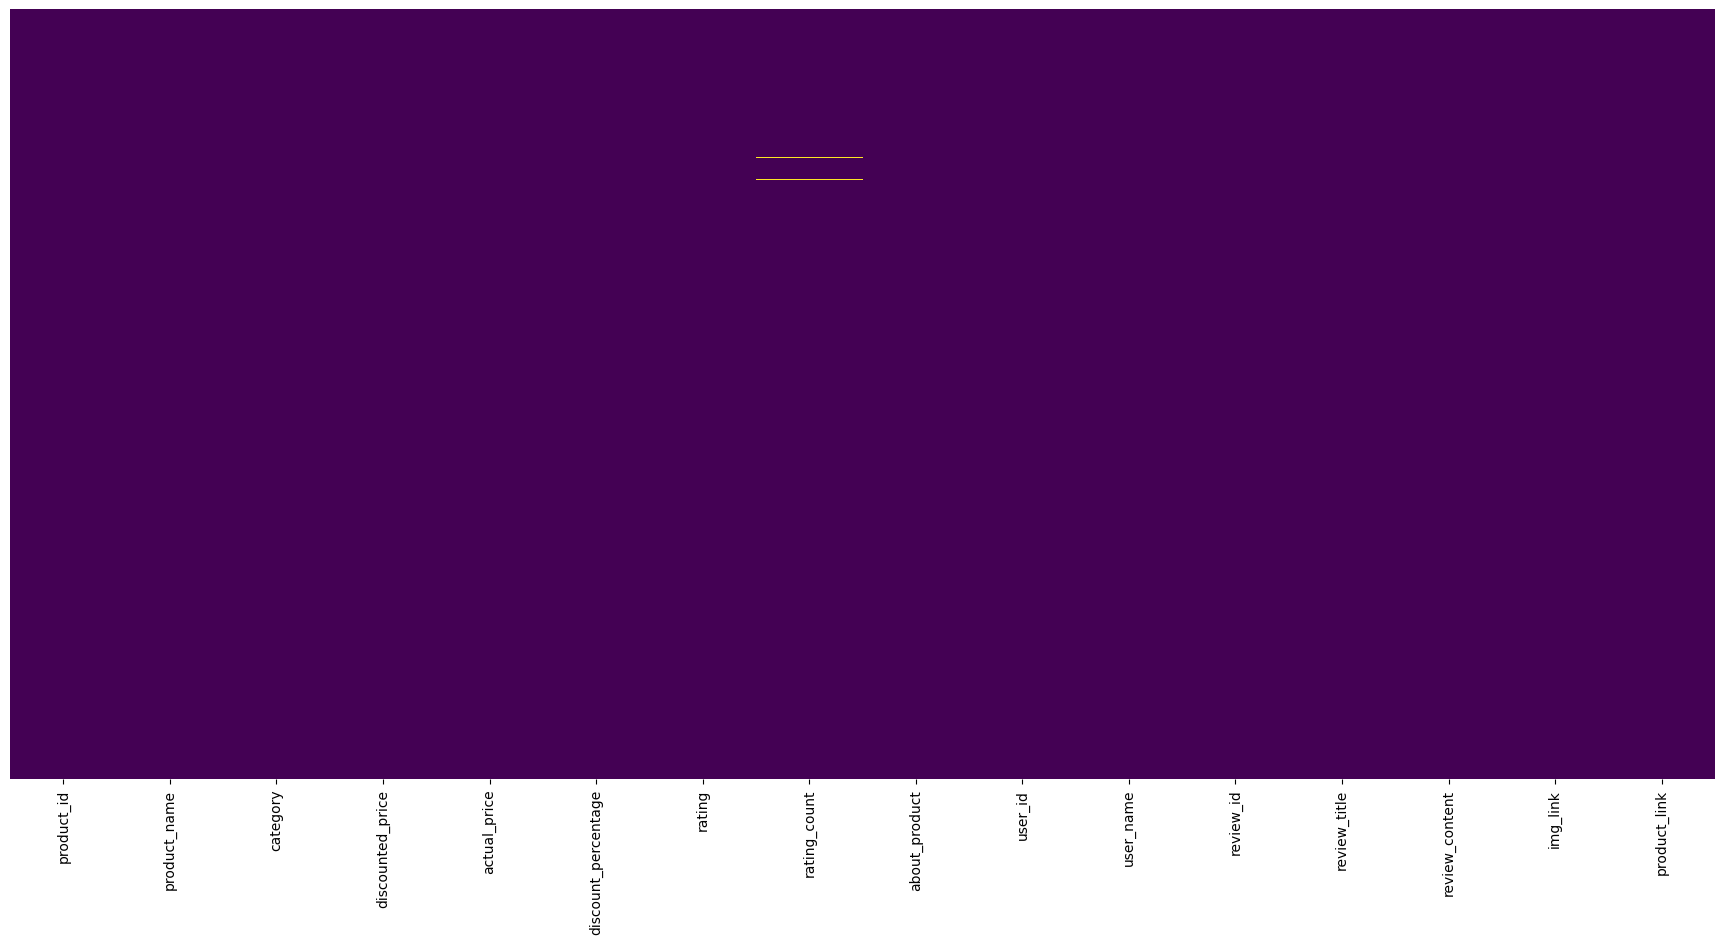

In [28]:
# make a figure size
plt.figure(figsize=(22, 10))
# plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

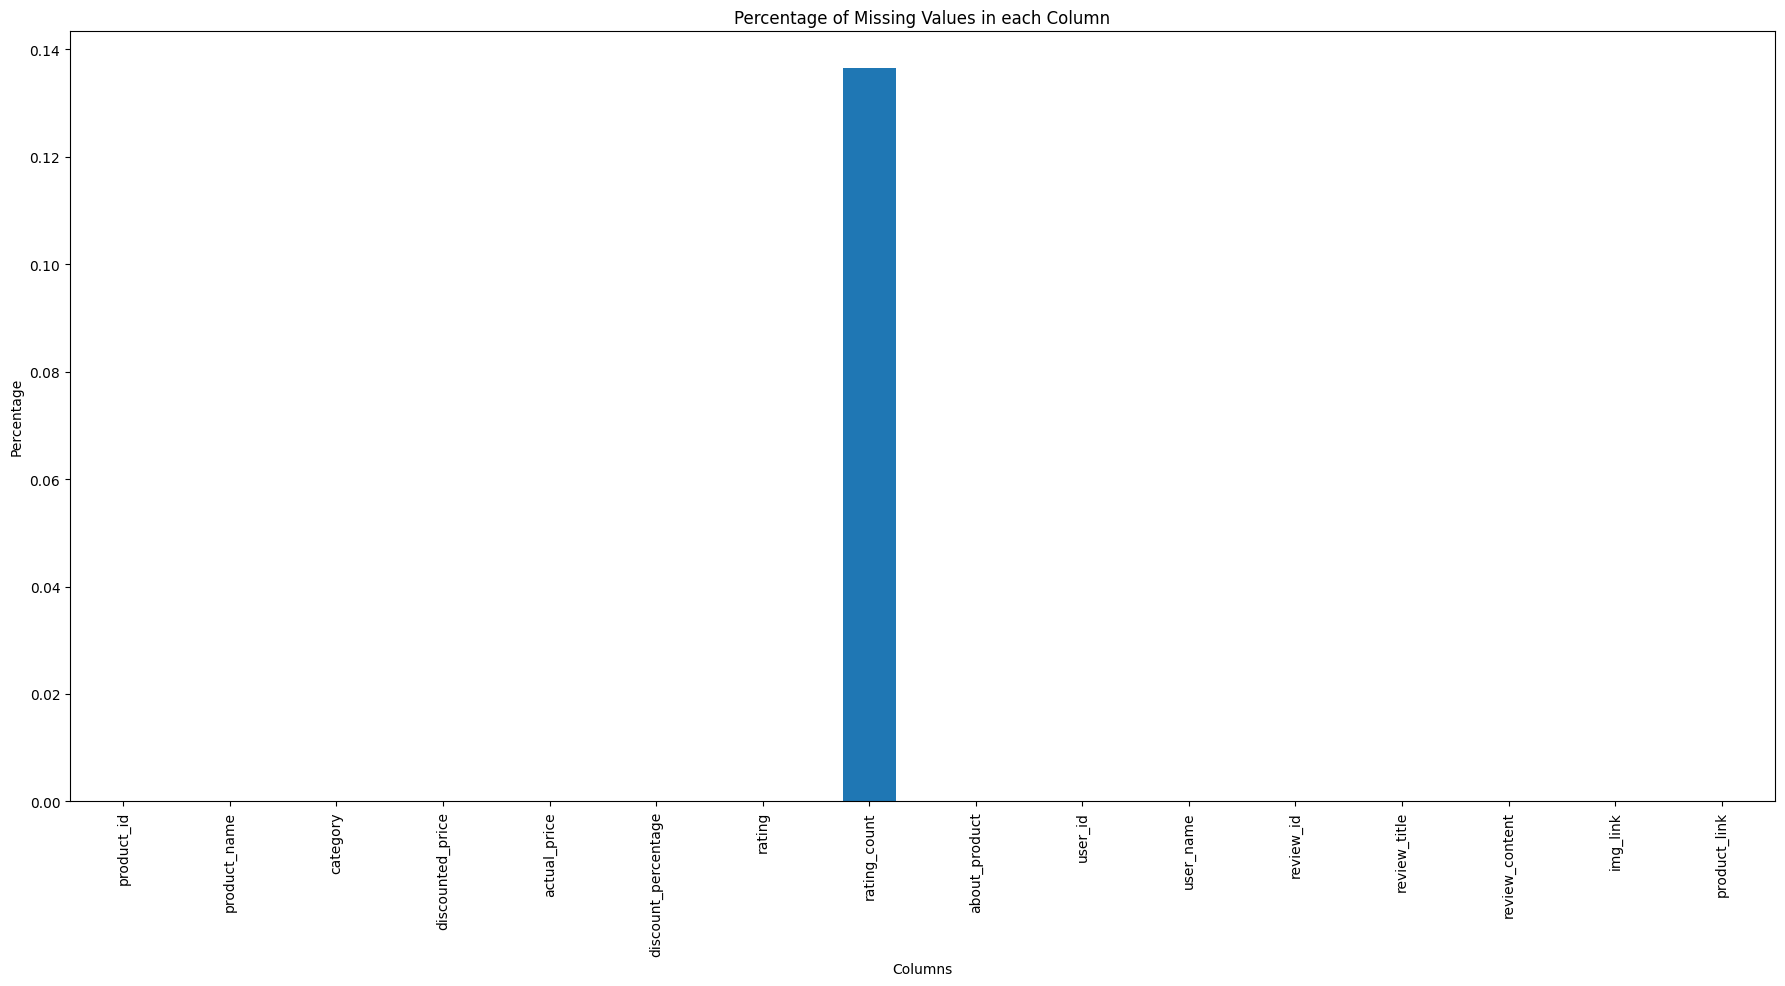

In [29]:
# make figure size
plt.figure(figsize=(22, 10))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [30]:
df[df['rating_count'].isnull()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,1257,88,10,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,53,652,1139,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,1349,875,10,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,748,35,1109,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [31]:
# Impute missing values
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [32]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [33]:
# Find Duplicate
df.duplicated().any()

np.False_

In [34]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [35]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()

In [36]:
any_duplicates

np.False_

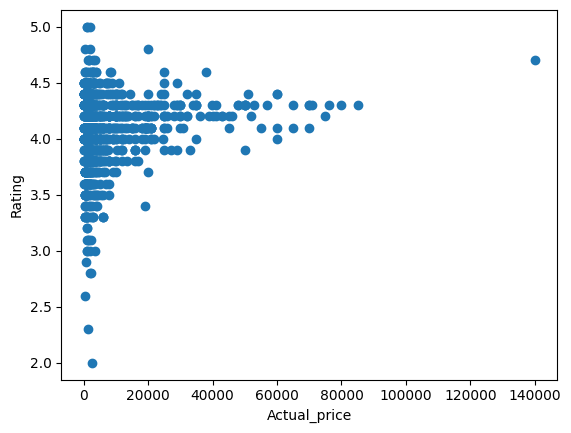

In [37]:
# Plot actual_price vs. rating
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('Rating')
plt.show()

In [38]:
# dont show warnings
import warnings
warnings.filterwarnings('ignore')

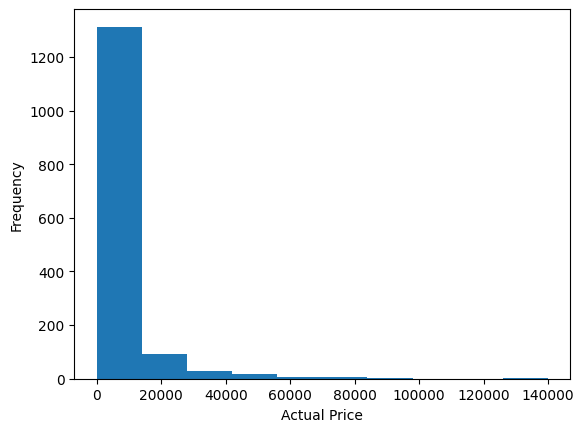

In [39]:
# Plot distribution of actual_price
plt.hist(df['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder
# label encode categorical variables

label_cols = [
    'product_id', 'category', 'review_id', 
    'product_name', 'user_name', 
    'user_id'
]

le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

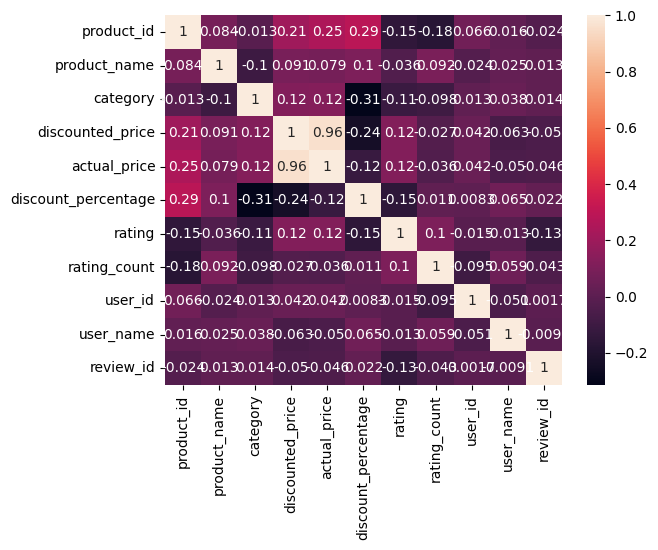

In [41]:
# Plot correlations between variables
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.084089 -0.012565          0.206448   
product_name           0.084089      1.000000 -0.103778          0.090665   
category              -0.012565     -0.103778  1.000000          0.119365   
discounted_price       0.206448      0.090665  0.119365          1.000000   
actual_price           0.246733      0.078567  0.122451          0.961915   
discount_percentage    0.289514      0.101913 -0.314465         -0.242412   
rating                -0.149105     -0.035592 -0.109424          0.120386   
rating_count          -0.175530      0.092450 -0.098421         -0.027081   
user_id                0.065688     -0.024093  0.012707          0.041731   
user_name              0.016145      0.024598  0.037822         -0.063069   
review_id             -0.024282      0.013492  0.014015         -0.049757   

                     actual_price  discount_percentage    rating  \
product

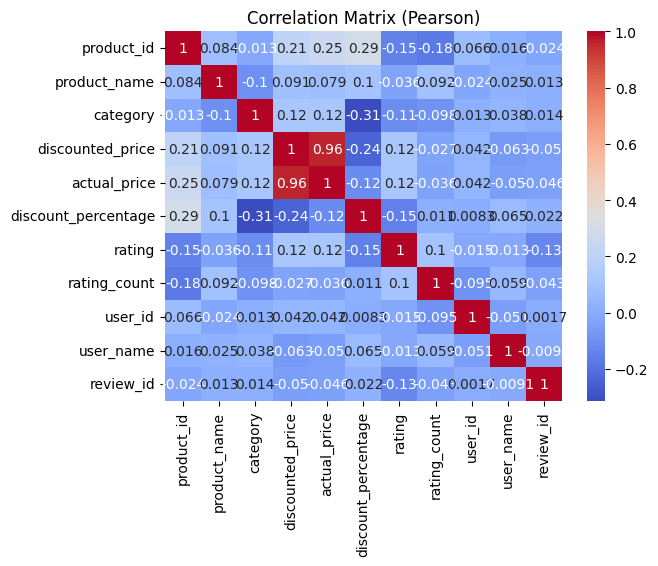

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.083112 -0.013553          0.146237   
product_name           0.083112      1.000000 -0.106193          0.056597   
category              -0.013553     -0.106193  1.000000          0.360733   
discounted_price       0.146237      0.056597  0.360733          1.000000   
actual_price           0.269064      0.105719  0.277291          0.932787   
discount_percentage    0.271879      0.106467 -0.322090         -0.372991   
rating                -0.144268     -0.061395 -0.101758          0.079412   
rating_count          -0.406559      0.128565 -0.171893          0.122296   
user_id                0.065228     -0.023810  0.015389          0.079048   
user_name              0.016859      0.024479  0.038735         -0.018599   
review_id             -0.024644      0.015269  0.016119         -0.048420   

                     actual_price  discount_percentage    rating  \
product

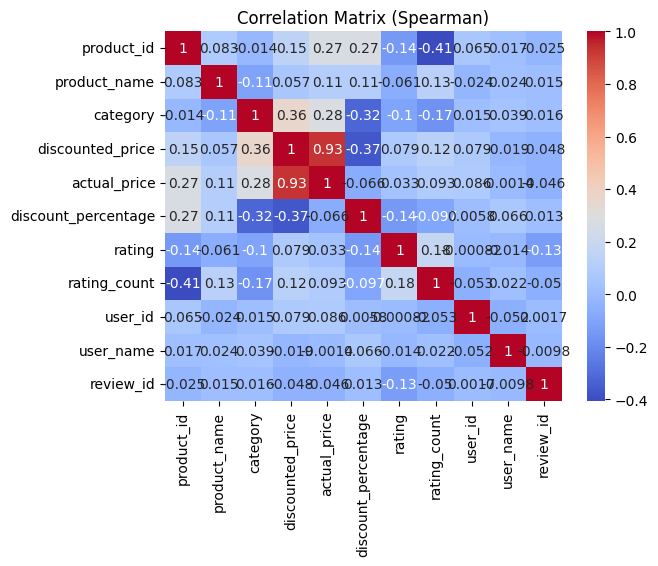

In [42]:


# Calculate Pearson correlation coefficients (default)
correlation_matrix = df.select_dtypes(include='number').corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Pearson)")
plt.show()

# Calculate Spearman correlation coefficients (for non-linear relationships)
spearman_correlation_matrix = df.select_dtypes(include='number').corr(method="spearman")
print(spearman_correlation_matrix)

sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()


In [43]:
# Calculate correlation coefficient between product price and sales
correlation_coefficient = np.corrcoef(df['actual_price'], df['rating'])[0, 1]

# Print correlation coefficient
print(correlation_coefficient)

0.1217444960999837


In [44]:
# Calculate mean sales by product category
grouped_df = df.groupby('category')['rating'].mean()

# Print mean sales by product category
print(grouped_df)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64


In [45]:
# Mean rating by category
mean_sales_by_category = df.groupby('category')['rating'].mean()
print(mean_sales_by_category)

# Median rating by review_content
median_sales_by_age = df.groupby('review_content')['rating'].median()
print(median_sales_by_age)

# Standard deviation of actual_price by product_name
std_price_by_brand = df.groupby('product_name')['actual_price'].std()
print(std_price_by_brand)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64
review_content
(Realme Buds Wireless design and  specifications)Truly wireless earphones are becoming very popular, and we could very well see Realme get into that space in the coming months. However, for now, the company has taken on wireless headphones in an affordable form — neckband-style earphones. The headset has a flexible neckband with metal modules at the ends, short cables that lead to the earbuds, and the plastic earbuds themselves. We quite liked the yellow-and-black colour scheme of our review unit. The design is simple and the build quality is decent. The device is light at just 30g, and comfortable to wear and use for long hours at a stretch.Like earlier Realme earphones, the Realme Buds Wireless have magnets in each earbud. While they don't serve 

In [46]:
# Pivot table of rating by category and customer location
pivot_table = df.pivot_table(values='rating', index='category', columns='product_link', aggfunc='mean')
print(pivot_table)

# Pivot table of average rating_count by customer age group and product category
pivot_table = df.pivot_table(values='rating_count', index='review_content', columns='category', aggfunc='mean')
print(pivot_table)

product_link  https://www.amazon.in/1-8Litre-Electric-Kettle-Stainless-16088/dp/B094G9L9LT/ref=sr_1_179?qid=1672923600&s=kitchen&sr=1-179  \
category                                                                                                                                    
0                                                           NaN                                                                             
1                                                           NaN                                                                             
2                                                           NaN                                                                             
3                                                           NaN                                                                             
4                                                           NaN                                                                             
...          

In [54]:
import scipy.stats as stats

# Conduct t-test to compare rating between two categories
t_statistic, p_value = stats.ttest_ind(df[df['category'] == 'electronics']['rating'], df[df['category'] == 'clothing']['rating'])

# Print t-statistic and p-value
print(t_statistic, p_value)

nan nan


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   int64  
 1   product_name         1465 non-null   int64  
 2   category             1465 non-null   int64  
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   int64  
 10  user_name            1465 non-null   int64  
 11  review_id            1465 non-null   int64  
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [55]:
# Chi-square test

# Create a contigency table
contigency_table = pd.crosstab(df['actual_price'], df['rating'])
contigency_table

rating,2.0,2.3,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
actual_price,,,,,,,,,,,,,,,,,,,,,,,,,
39.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
79.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
75990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
79990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")

Chi-square statistic: 8635.264277480239
p-value: 1.0
Degrees of freedom: 10752
Expected:
 [[0.00136519 0.00136519 0.00136519 ... 0.00819113 0.00409556 0.00409556]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 ...
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]]


In [59]:
from sklearn.preprocessing import LabelEncoder

# Columns you want to encode
cols_to_encode = [
    'product_id', 'category', 'review_id', 'review_content', 'product_name',
    'user_name', 'about_product', 'user_id', 'review_title',
    'img_link', 'product_link'
]

# Dictionary to store encoders
encoders = {}

# Fit encoders and transform the columns
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))   # encode
    encoders[col] = le                                 # store encoder

# Inverse transform using saved encoders
for col in cols_to_encode:
    df[col] = encoders[col].inverse_transform(df[col])
